# <center>***A Beginner's Step by Step Guide to EDA***

**Exploratory Data Analysis (EDA)** is the first step to becoming a Data Scientist.<br>

As stated by IBM **"EDA is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions."**

<div style="width:100%;text-align: center;"> <img align=middle src="https://pbs.twimg.com/media/EcypKzVXgAAH6tg?format=jpg&name=small" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

# **Loading the dataset.**
Data come in many formats. The first and foremost is to load the data into a dataframe.<br>
This can be done primarily using *pandas*.

Data Source : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

The *read_csv* function is used to load csv files to the dataframe. This can be replaced by a number of other functions to suit the type of format we need to load. The most common formats aside from **csv** are __excel__ and __json__. Many IDEs have ___Auto-suggestions___ which show a list of functions that can be used. In Jupyter notebook one can use the __tab__ key to get a list of suggestions. 

**parse_dates** and **index_col** are a couple of useful parameters that can be tweaked to load the data in the required format
- parse_dates is used to load the dates in a dataset as datetime format. By default it is loaded as object format.
- index_col is used to set the preferred column as the index. By default the first column is taken as the index.

Don't worry if you did not use these parameters, since you won't always know what the data might contain. Pandas also has functions to change the format<br> of dates and set preferred column as index later as well.

# **Getting to know the data**

Next step is to look at the data and know what it contains.

In [3]:
df.head() #By default it shows the first 5 rows only. Which can be increased or decreased by specifying the number of rows inside the parathesis.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape # Gives the number of rows and as columns in the dataframe.

(7043, 21)

The values represent **(rows, columns)**.<br>
Here the data contains 7043 rows and 21 columns.
Although calling them rows and columns is not wrong. Some prefer to call them as ***observations*** and ***features***. So don't be confused when you come across people saying the data contains n_observations and n_features.
- Rows    --> Observations
- Columns --> Features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Gives basic information about the data including the names, shape, datatypes of features.
It is imperative to know what the features represent to know how they might contribute to the whole scenario.
Here the Total Charges is of type object but in reality it is a float, so we change the data type.

We find if there are any missing values in the data. **Missing values** pose a huge problem because it hinders the ability of the algorithm to learn from the features and also **undermines the contribution** of the features in the overall prediction.

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This is a clean dataset so there are no missing values.
Missing values can be addressed by :-
- Dropping the feature or observation if it contains too much missing values.
- Label Encoding the missing values.

Next we get the description of the dataset.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


This gives the five number summary of the numerical datatypes. The five number summary denotes the minimum value, 25% (first quartile), 50% (second quartile or median), 75% (third quartile) and maximum value. 25% --> called **twenty fifth percentile**

In [8]:
df.describe(include='all')# using include='all' describes all the features including non-numerical ones.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Finding the number of unique values in each feature. This is important because the high number of unique values denote it is a continous data and less unique values denote the feature is a categorical feature.

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We see that all of the observations of customerID have unique values since <br>
__Total Unique values of customerID = Total number of rows/observations in the dataset__<br>
Hence it is deduced that customerID is unique and no more than one customer can have the same customerID.<br>
Having such features is not advised because the algorithm may learn byheart the outcome of the value i.e., it may directly fetch the target variable <br>directly without properly learning as intended.<br>
So it is always recommended to drop such features.

In [10]:
df.drop(labels = 'customerID', axis = 1, inplace= True)#inplace = True makes the change permanent in the dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The customerID has been dropped out of the dataframe.

In [11]:
df['gender'].value_counts() #gives count of the various categories of the feature

Male      3555
Female    3488
Name: gender, dtype: int64

We can use the groupby function to group our data according to the feature of our choice. It is especially powerful when used to gain insights on
how the data is distributed based on a certain feature. 

In [12]:
df.groupby(['PaymentMethod','gender']).count()

SeniorCitizen  Partner  Dependents  tenure  \
PaymentMethod             gender                                               
Bank transfer (automatic) Female            788      788         788     788   
                          Male              756      756         756     756   
Credit card (automatic)   Female            752      752         752     752   
                          Male              770      770         770     770   
Electronic check          Female           1170     1170        1170    1170   
                          Male             1195     1195        1195    1195   
Mailed check              Female            778      778         778     778   
                          Male              834      834         834     834   

                                  PhoneService  MultipleLines  \
PaymentMethod             gender                                
Bank transfer (automatic) Female           788            788   
                          Male             756            756   
Credit card (automatic)   Female           752            752   
                          Male             770            770   
Electronic check          Female          1170           1170   
                          Male            1195           1195   
Mailed check              Female           778            778   
                          Male             834            834   

                                  InternetService  OnlineSecurity  \
PaymentMethod             gender                                    
Bank transfer (automatic) Female              788             788   
                          Male                756             756   
Credit card (automatic)   Female              752             752   
                          Male                770             770   
Electronic check          Female             1170            1170   
                          Male               1195            1195   
Mailed check              Female              778             778   
                          Male                834             834   

                                  OnlineBackup  DeviceProtection  TechSupport  \
PaymentMethod             gender                                                
Bank transfer (automatic) Female           788               788          788   
                          Male             756               756          756   
Credit card (automatic)   Female           752               752          752   
                          Male             770               770          770   
Electronic check          Female          1170              1170         1170   
                          Male            1195              1195         1195   
Mailed check              Female           778               778          778   
                          Male             834               834          834   

                                  StreamingTV  StreamingMovies  Contract  \
PaymentMethod             gender                                           
Bank transfer (automatic) Female          788              788       788   
                          Male            756              756       756   
Credit card (automatic)   Female          752              752       752   
                          Male            770              770       770   
Electronic check          Female         1170             1170      1170   
                          Male           1195             1195      1195   
Mailed check              Female          778              778       778   
                          Male            834              834       834   

                                  PaperlessBilling  MonthlyCharges  \
PaymentMethod             gender                                     
Bank transfer (automatic) Female               788             788   
                          Male                 756             756   
Credit card (automatic)   Female       

Here the groupby function is used to check how people made their payment and the gender distribution of those people.

# Seperate the dataframe to continuous and discrete data

In [13]:
df_con = df.loc[:,['MonthlyCharges','TotalCharges']]
df_con.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.5
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [14]:
df_discrete = df.drop(labels = ['MonthlyCharges','TotalCharges'], axis = 1)

In [15]:
df_discrete.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

# Encoding the data

This is done to ease the computation and convert all the in features to numbers. Encoding the entire dataframe also encodes the continuous data like Monthly charges, this will affect future analysis and render it incorrect.

In [16]:
from sklearn.preprocessing import LabelEncoder
col = list(df_discrete)
df_discrete[col] = df_discrete[col].apply(LabelEncoder().fit_transform)
df_discrete.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1


# Visualizing the data

## <center>A picture speaks a thousand words

<div style="width:100%;text-align: center;"> <img align=middle src="https://qph.cf2.quoracdn.net/main-qimg-1fe7bdc5a857199ce0402eb10b268cab-lq" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

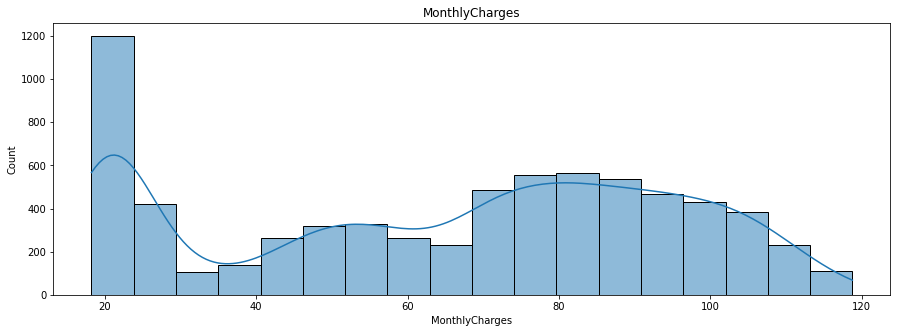

In [17]:
plt.figure(figsize=(15, 5))
sns.histplot(data = df_con['MonthlyCharges'], kde =True)
plt.title('MonthlyCharges')
plt.show()

The datatype of the TotalCharges feature is denoted as object, this is an incorrect representation of the data as TotalCharges are numbers. This is type of faulty representaion is a common occurence since data can be from multiple sources and messy.

In [18]:
df_con['TotalCharges'].dtypes

dtype('O')

In [19]:
def cost(value):
    value= str(value)
    if ' ' in value:
        value = float(value.replace(' ',str(np.nan)))
        return value
    else:
        return float(value)

df_con['TotalCharges'] = df_con['TotalCharges'].apply(cost)
df_con['TotalCharges'].dtypes

dtype('float64')

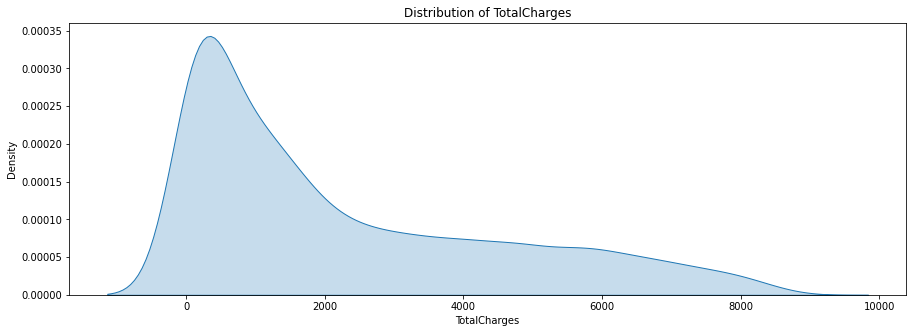

In [20]:
plt.figure(figsize=(15, 5))
sns.kdeplot(x = df_con['TotalCharges'], shade=True)#,y = df_con['MonthlyCharges'], hue=df['tenure'])
plt.title('Distribution of TotalCharges')
plt.show()

Scatterplots are great to know the relation between two features and we can also introduce a third feature to have more insight on the data.

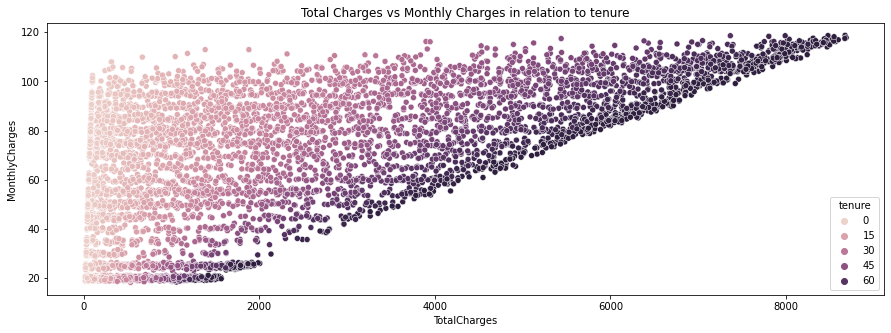

In [21]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = df_con['TotalCharges'],y = df_con['MonthlyCharges'], hue=df['tenure'])
plt.title('Total Charges vs Monthly Charges in relation to tenure')
plt.show()

Plotting the Monthly Charges against the Total Charges with respect to tenure we find that the people spend more as their tenure increases this also points out that they have more financial power compared to youngsters who have just started.

We can also iterate through the features and plot against the desired feature. Barplots are usually for discrete features 

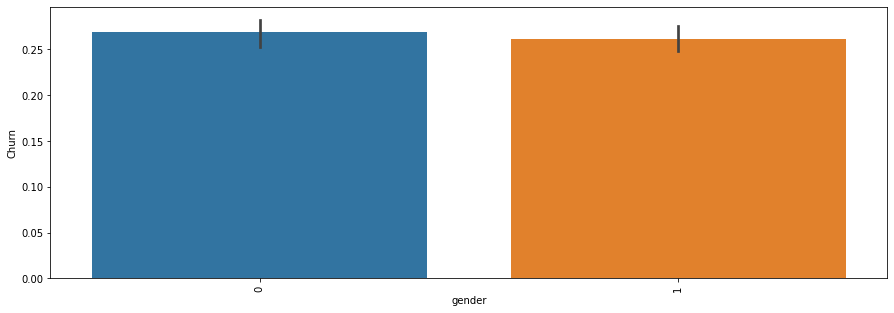

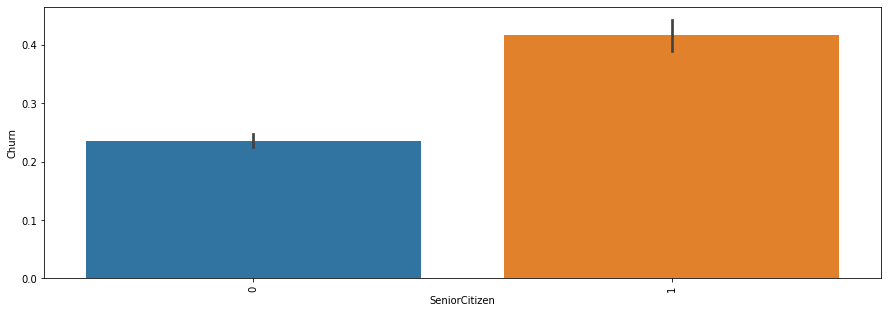

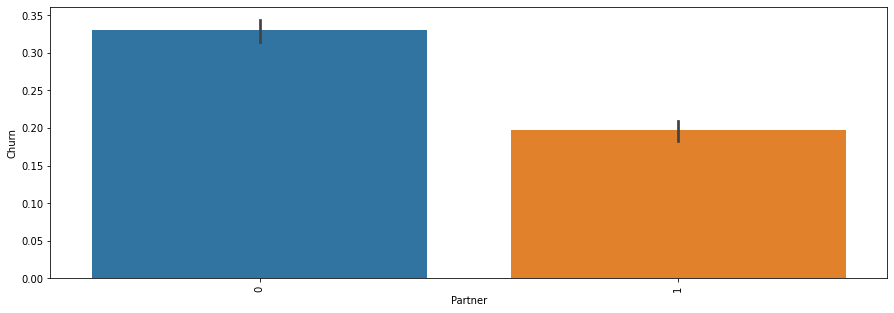

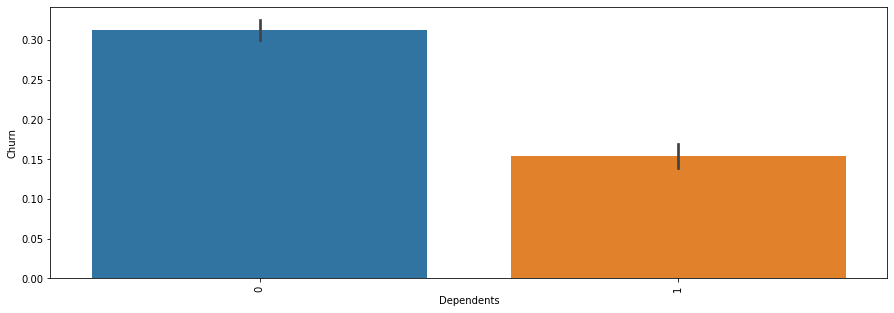

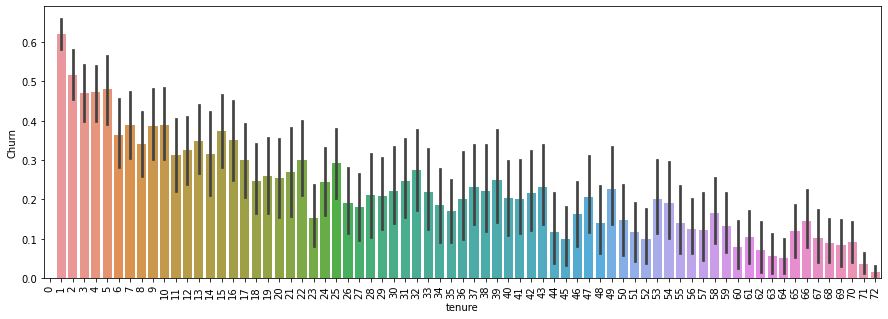

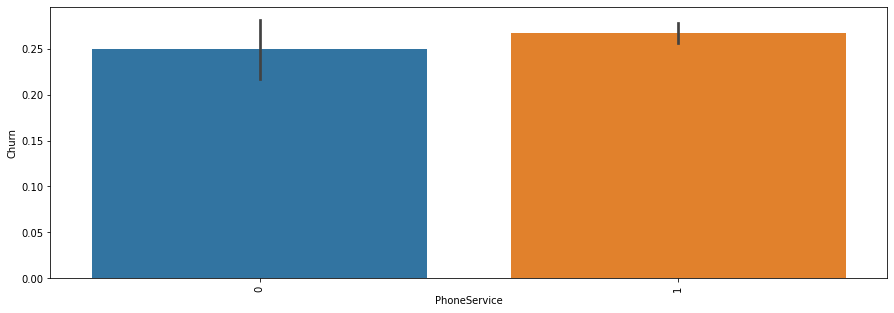

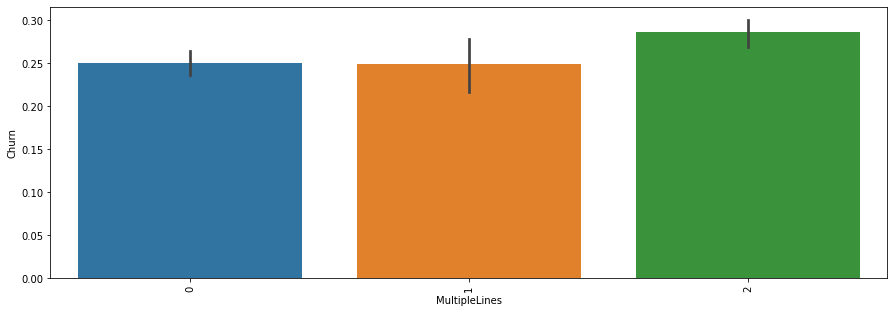

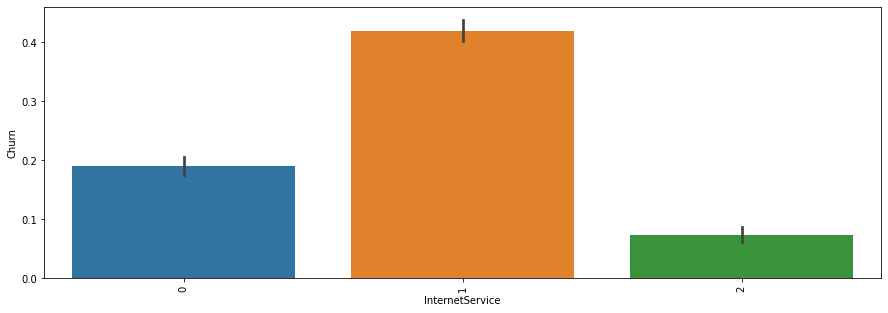

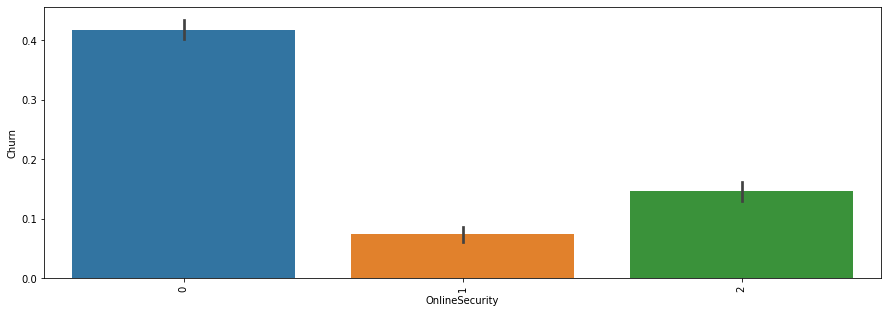

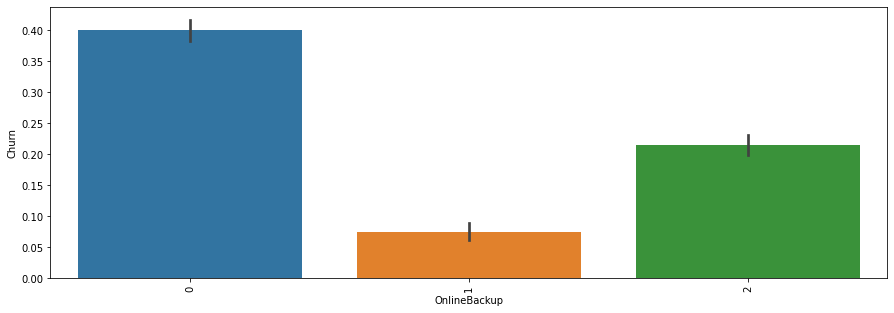

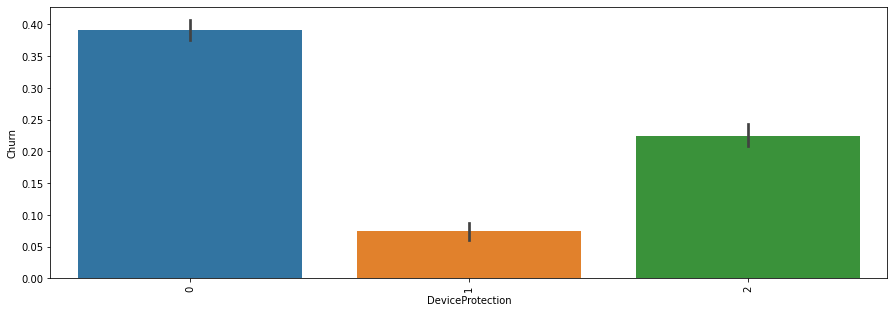

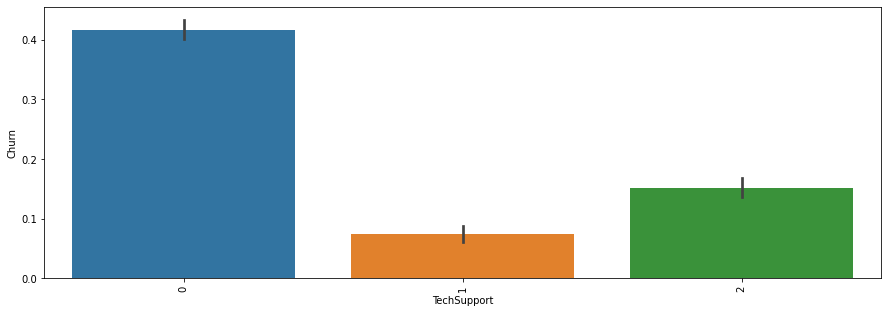

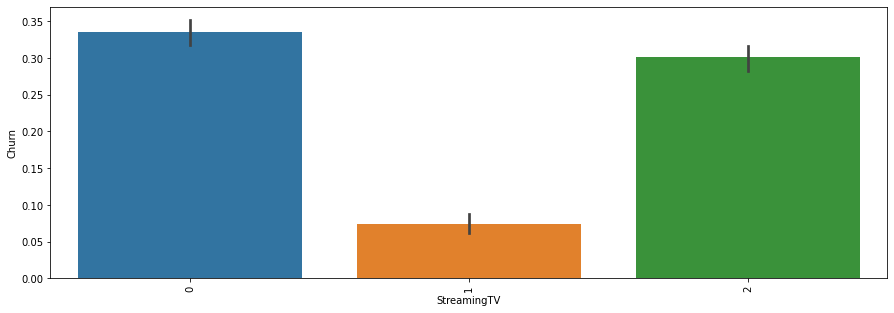

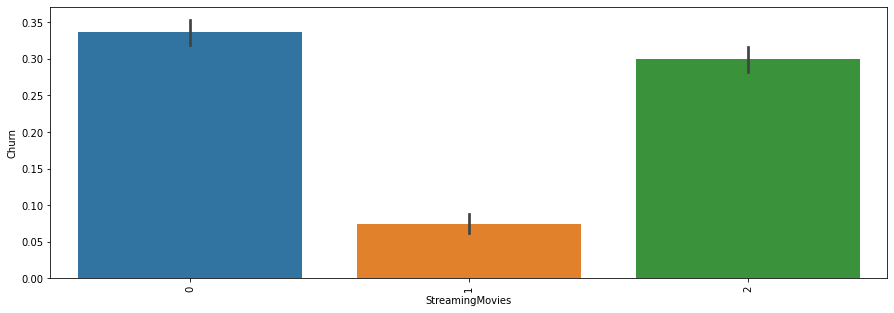

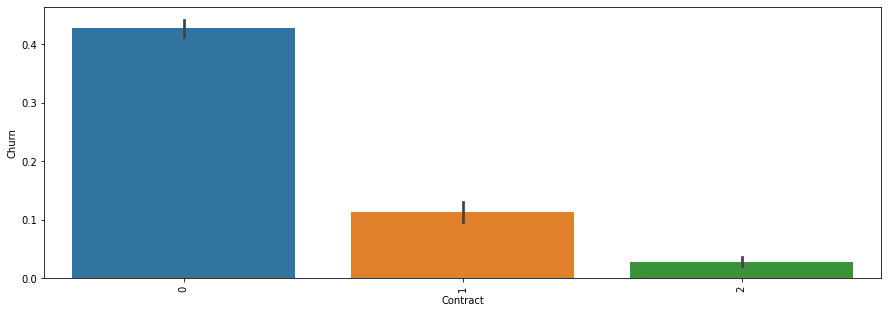

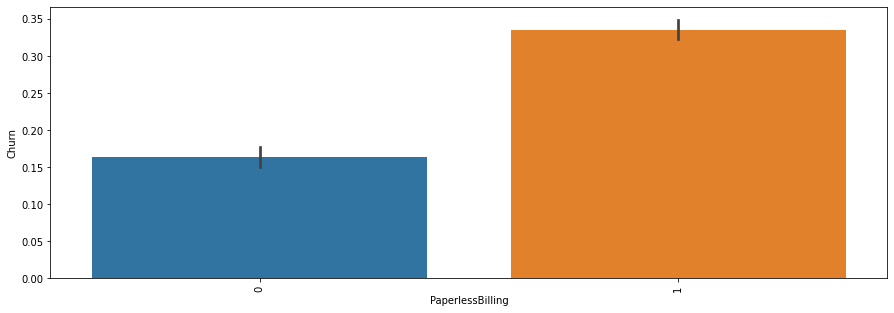

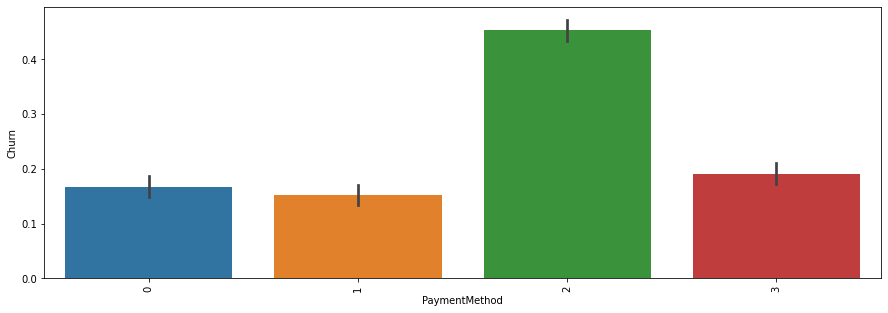

In [22]:
for feature in range(len(df_discrete.columns)-1):
    plt.figure(figsize=(15, 5))
    sns.barplot(x = df_discrete.iloc[:,feature], y = df_discrete['Churn'])
    plt.xticks(rotation = 90)
    plt.show()

# Finding the Correlation between the features

Finding the correlation helps in identifying how each feature is correlated and also how it is correlated to the target variable.<br>Correlation ranges from -1 to 1.
- -1 =< Corr < 0  --> Negatively correlated
- Corr = 0        --> No correlation
- 0 < Corr =< 1   --> Positively correlated

Since we have already seen how the continuous features are related to each other let's see the correlation between the discrete features.

In [23]:
corr = df_discrete.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,-0.195525


Plotting a heatmap is visually more appealing, faster and easier to view

<AxesSubplot:>

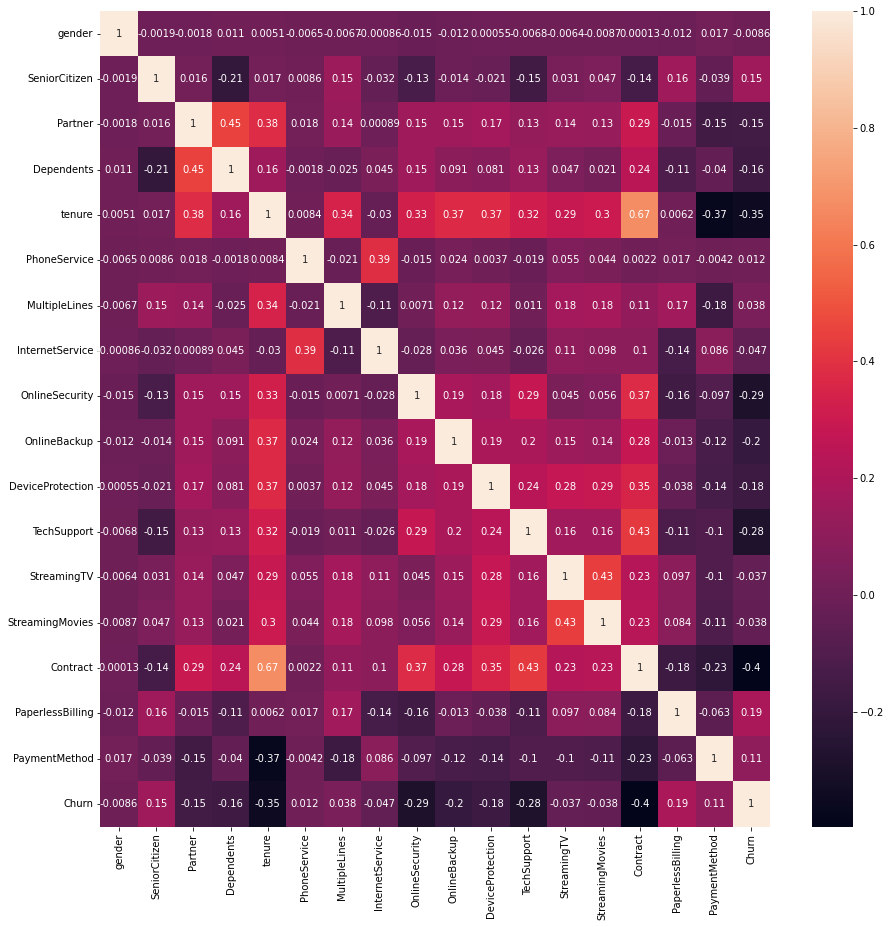

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot = True)

<div style="width:100%;text-align: center;"> <img align=middle src="https://pbs.twimg.com/media/CsnwmmQWYAEgqyk.jpg" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>